#Customer Churn Dataset Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE


In [ ]:
df = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
print(df['TotalCharges'].isnull().sum())

11


In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<ipython-input-6-64493bf53d4b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:
all_cols = ['customerID','gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']

In [ ]:
for col in all_cols:
  print(f"Unique Values in {col}:", df[col].unique())

Unique Values in customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique Values in gender: ['Female' 'Male']
Unique Values in SeniorCitizen: [0 1]
Unique Values in Partner: ['Yes' 'No']
Unique Values in Dependents: ['No' 'Yes']
Unique Values in tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique Values in PhoneService: ['No' 'Yes']
Unique Values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique Values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique Values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique Values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique Values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique Values in TechSupport: ['No' 'Yes' 'No internet service']
Unique Values in StreamingTV: ['No' '

In [ ]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

<ipython-input-9-0087e48153b6>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


In [ ]:
no_internet_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in no_internet_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

In [ ]:
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

In [ ]:
#df.drop(columns=['customerID'], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes
print(X_train.shape, X_test.shape)

(5634, 24) (1409, 24)


In [ ]:
print(X_train.info())
print(X_train.describe())  # Summary statistics


<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2142 to 860
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             5634 non-null   object 
 1   gender                                 5634 non-null   int64  
 2   SeniorCitizen                          5634 non-null   int64  
 3   Partner                                5634 non-null   int64  
 4   Dependents                             5634 non-null   int64  
 5   tenure                                 5634 non-null   int64  
 6   PhoneService                           5634 non-null   int64  
 7   OnlineSecurity                         5634 non-null   object 
 8   OnlineBackup                           5634 non-null   object 
 9   DeviceProtection                       5634 non-null   object 
 10  TechSupport                            5634 non-null   object 
 11  Streami

Overall Churn Rate: 26.54%


<ipython-input-15-9063b41e5a2d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Churn'], palette=['skyblue', 'salmon'])


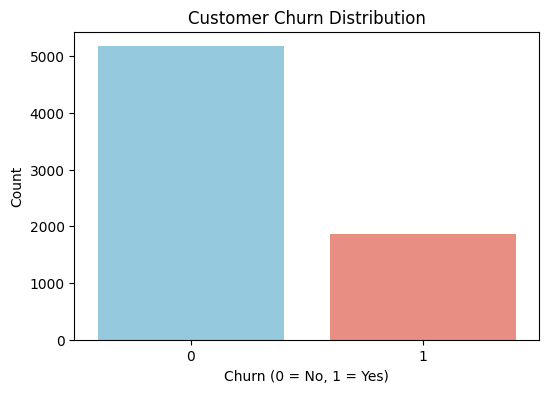

In [ ]:
# Calculate churn rate
churn_rate = df['Churn'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

# Visualize churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Churn'], palette=['skyblue', 'salmon'])
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

<ipython-input-16-c5013db3cbb2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'], palette="viridis")


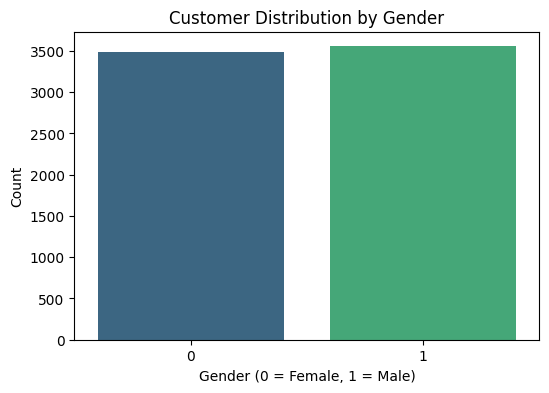

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['gender'], palette="viridis")
plt.title("Customer Distribution by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

<ipython-input-17-b07417945977>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Partner'], palette="coolwarm")


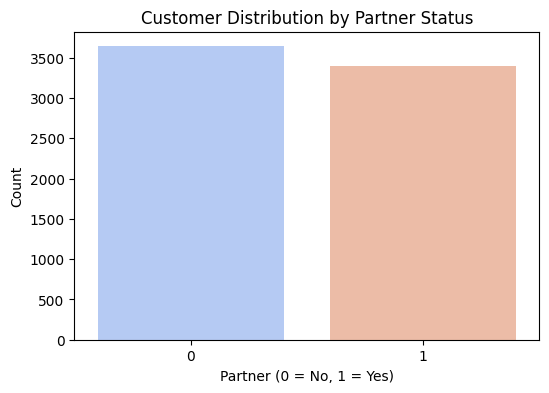

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Partner'], palette="coolwarm")
plt.title("Customer Distribution by Partner Status")
plt.xlabel("Partner (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

<ipython-input-18-56a45345222b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Dependents'], palette="magma")


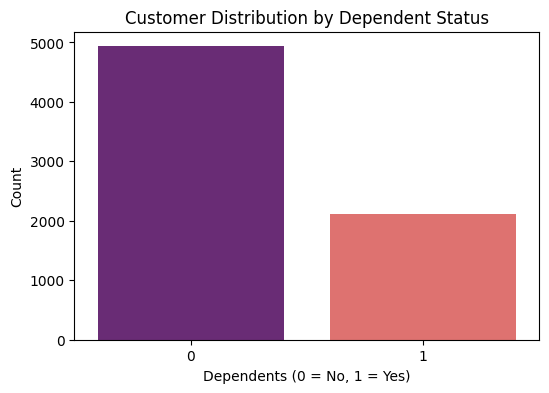

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Dependents'], palette="magma")
plt.title("Customer Distribution by Dependent Status")
plt.xlabel("Dependents (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

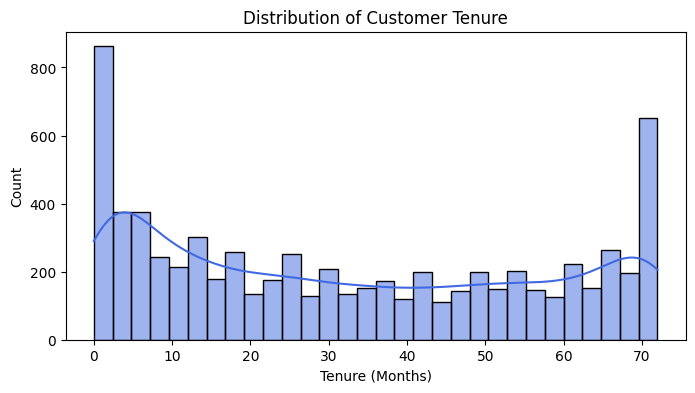

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['tenure'], bins=30, kde=True, color="royalblue")
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()

<ipython-input-20-325c8ee808e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df['tenure'], palette=['lightblue', 'salmon'])


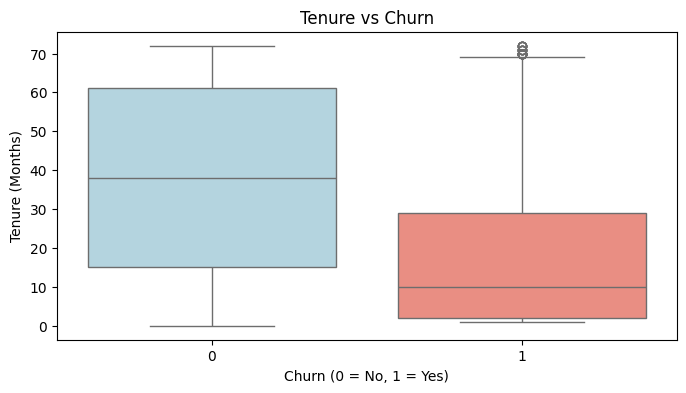

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Churn'], y=df['tenure'], palette=['lightblue', 'salmon'])
plt.title("Tenure vs Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Tenure (Months)")
plt.show()

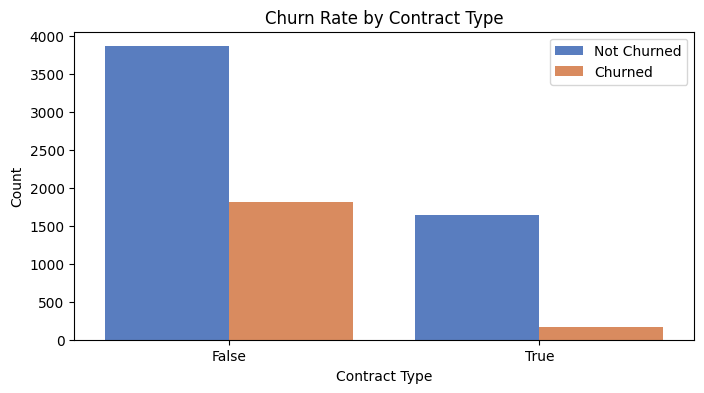

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Contract_One year'], hue=df['Churn'], palette="muted")
sns.countplot(x=df['Contract_Two year'], hue=df['Churn'], palette="muted")
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(["Not Churned", "Churned"])
plt.show()

<ipython-input-22-b406f8dfe210>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PaymentMethod", y="Churn", data=df_payment, palette="coolwarm")


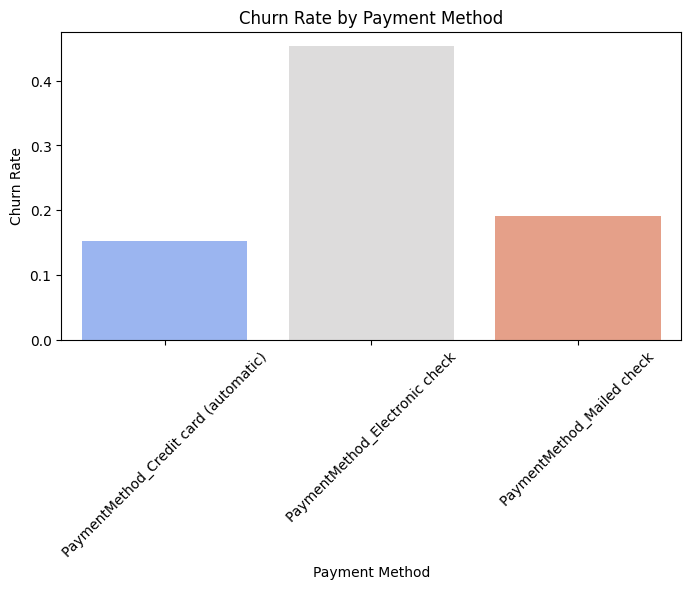

In [ ]:
# List of payment method columns
payment_cols = ['PaymentMethod_Credit card (automatic)',
                'PaymentMethod_Electronic check',
                'PaymentMethod_Mailed check']

# Convert boolean values to categorical labels
df_melted = df.melt(id_vars=['Churn'], value_vars=payment_cols, var_name="PaymentMethod", value_name="IsSelected")

# Filter only rows where the payment method is selected (IsSelected = True)
df_melted = df_melted[df_melted["IsSelected"] == True]

# Calculate churn rate for each payment method
df_payment = df_melted.groupby("PaymentMethod")["Churn"].mean().reset_index()

# Plot the churn rate by payment method
plt.figure(figsize=(8, 4))
sns.barplot(x="PaymentMethod", y="Churn", data=df_payment, palette="coolwarm")
plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.show()


In [ ]:
bins = [0, 12, 36, 72]
labels = ['New', 'Moderate', 'Long-term']
df['TenureSegment'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

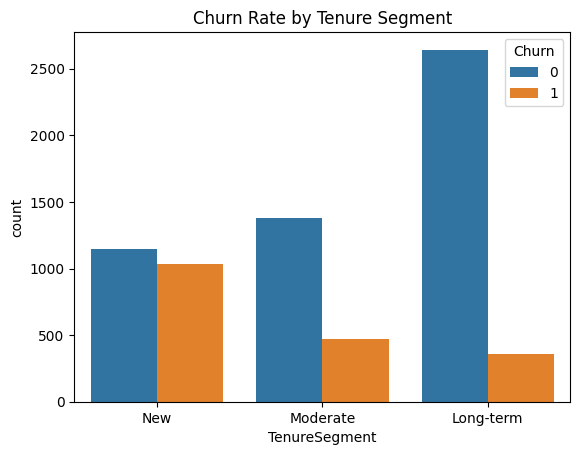

In [ ]:
sns.countplot(x='TenureSegment', hue='Churn', data=df)
plt.title('Churn Rate by Tenure Segment')
plt.show()

In [ ]:
df['ChargeSegment'] = pd.qcut(df['MonthlyCharges'], q=3, labels=['Low', 'Medium', 'High'])


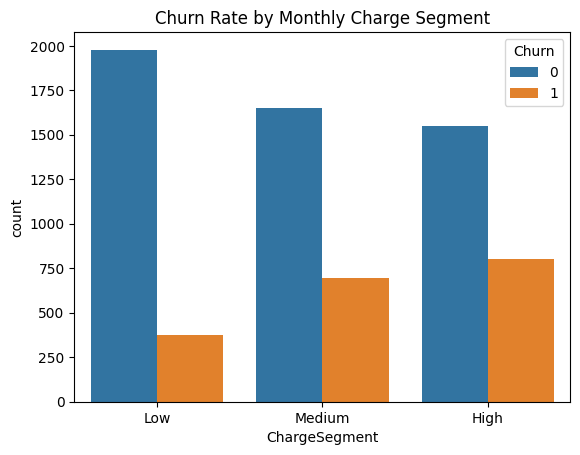

In [ ]:
sns.countplot(x='ChargeSegment', hue='Churn', data=df)
plt.title('Churn Rate by Monthly Charge Segment')
plt.show()


In [ ]:
# sns.countplot(x='Contract', hue='Churn', data=df)
# plt.title('Churn Rate by Contract Type')
# plt.show()


In [ ]:
print(df.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'TenureSegment', 'ChargeSegment'],
      dtype='object')


In [ ]:
def contract_type(row):
    if row['Contract_One year'] == 1:
        return 'One year'
    elif row['Contract_Two year'] == 1:
        return 'Two year'
    else:
        return 'Month-to-month'

df['Contract'] = df.apply(contract_type, axis=1)


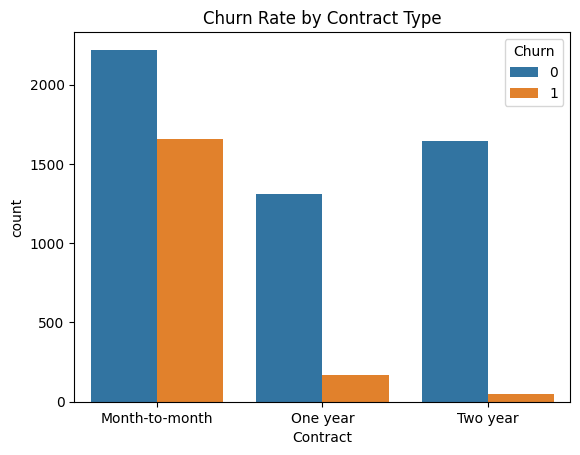

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.show()


In [ ]:
at_risk_customers = df[(df['ChargeSegment'] == 'High') &
                        (df['Contract'] == 'Month-to-month') &
                        (df['Churn'] == 'Yes')]

print("High-Value Customers at Risk of Churning:")
print(at_risk_customers[['customerID', 'tenure', 'MonthlyCharges', 'Contract']].head())


High-Value Customers at Risk of Churning:
Empty DataFrame
Columns: [customerID, tenure, MonthlyCharges, Contract]
Index: []


In [ ]:
high_tenure_threshold = df['tenure'].quantile(0.75)  # Top 25% in tenure
high_monthly_charges_threshold = df['MonthlyCharges'].quantile(0.75)  # Top 25% in charges

print(f"Tenure Threshold: {high_tenure_threshold}, Monthly Charges Threshold: {high_monthly_charges_threshold}")


Tenure Threshold: 55.0, Monthly Charges Threshold: 89.85


In [ ]:
high_value_customers = df[
    (df['tenure'] >= high_tenure_threshold) &
    (df['MonthlyCharges'] >= high_monthly_charges_threshold)
]

print(f"Number of High-Value Customers: {len(high_value_customers)}")


Number of High-Value Customers: 756


In [ ]:
high_value_churn = high_value_customers[high_value_customers['Churn'] == 1]

print(f"Number of High-Value Customers at Risk of Churning: {len(high_value_churn)}")
print(high_value_churn[['customerID', 'tenure', 'MonthlyCharges', 'Contract']])


Number of High-Value Customers at Risk of Churning: 110
      customerID  tenure  MonthlyCharges        Contract
104   3192-NQECA      68          110.00        Two year
110   0486-HECZI      55           96.75  Month-to-month
339   1343-EHPYB      63          103.40  Month-to-month
402   0979-PHULV      69           99.45  Month-to-month
445   7752-XUSCI      60          105.90  Month-to-month
...          ...     ...             ...             ...
6785  3090-HAWSU      61          111.60        Two year
6819  3005-NFMTA      55           98.80  Month-to-month
6945  6797-LNAQX      70           98.30        Two year
6972  6664-FPDAC      56          111.95        One year
7034  0639-TSIQW      67          102.95  Month-to-month

[110 rows x 4 columns]


In [ ]:
high_value_churn['Contract'].value_counts()


,count
Contract,
One year,48
Month-to-month,37
Two year,25


<ipython-input-36-53526c632b38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=high_value_churn['Contract'], palette='coolwarm')


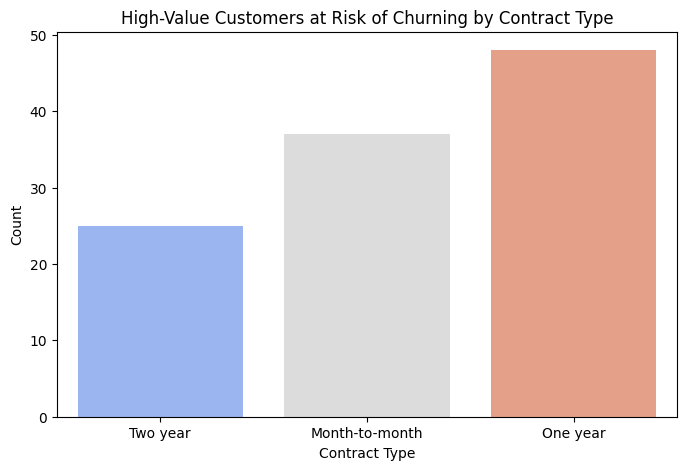

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=high_value_churn['Contract'], palette='coolwarm')
plt.title("High-Value Customers at Risk of Churning by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

In [ ]:
one_year_churn = high_value_churn[high_value_churn['Contract'] == 'One year']
print(one_year_churn[['customerID', 'tenure', 'MonthlyCharges']].describe())


          tenure  MonthlyCharges
count  48.000000       48.000000
mean   63.125000      104.790625
std     5.009034        6.253949
min    55.000000       90.600000
25%    58.750000      100.262500
50%    63.000000      104.675000
75%    67.000000      108.950000
max    72.000000      118.350000


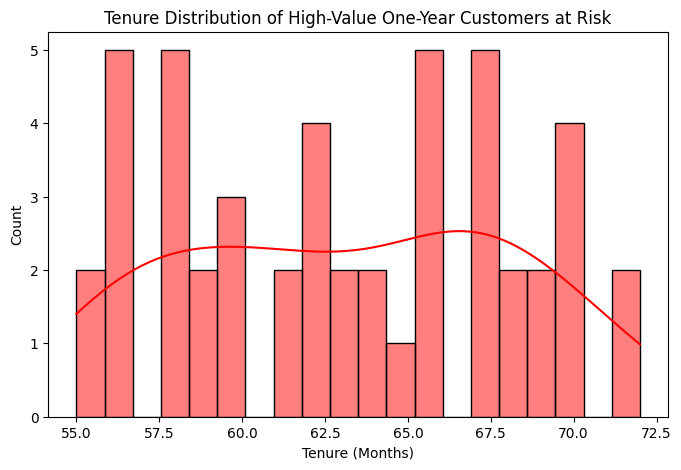

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(one_year_churn['tenure'], bins=20, kde=True, color='red')
plt.title("Tenure Distribution of High-Value One-Year Customers at Risk")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()

In [ ]:
contract_charges = high_value_churn.groupby('Contract')['MonthlyCharges'].mean()
print(contract_charges)


Contract
Month-to-month    100.535135
One year          104.790625
Two year          105.376000
Name: MonthlyCharges, dtype: float64


In [ ]:
label_encoders = {}
categorical_cols = ['Contract']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
X = df[['tenure', 'MonthlyCharges', 'Contract']]
y = df['Churn']  # Target variable

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluate Model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate Model
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1035
           1       0.54      0.44      0.49       374

    accuracy                           0.75      1409
   macro avg       0.67      0.65      0.66      1409
weighted avg       0.74      0.75      0.74      1409



In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
rf.fit(X_train_sm, y_train_sm)
y_pred_sm = rf.predict(X_test)

print("Random Forest after SMOTE:")
print(classification_report(y_test, y_pred_sm))

Random Forest after SMOTE:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1035
           1       0.51      0.75      0.60       374

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.74      0.75      1409



In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluate Model
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1035
           1       0.49      0.48      0.48       374

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate with Best Model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("Best Random Forest Model Performance:")
print(classification_report(y_test, y_pred_best))


Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.46      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Performance:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1035
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:53:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.metrics import precision_recall_curve

# Get probabilities
y_probs = rf.predict_proba(X_test)[:, 1]

threshold = 0.60
y_pred_adjusted = (y_probs > threshold).astype(int)

print("Adjusted Random Forest Performance:")
print(classification_report(y_test, y_pred_adjusted))


Adjusted Random Forest Performance:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1035
           1       0.55      0.64      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.71      1409
weighted avg       0.78      0.77      0.77      1409



In [ ]:
from tabulate import tabulate

# Store the results in a dictionary
results = {
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Random Forest (After SMOTE)",
        "Decision Tree",
        "Best Random Forest (Tuned)",
        "XGBoost",
        "Adjusted Random Forest"
    ],
    "Accuracy": [0.78, 0.75, 0.74, 0.73, 0.78, 0.78, 0.77],
    "Precision (Churn)": [0.60, 0.54, 0.51, 0.49, 0.63, 0.62, 0.55],
    "Recall (Churn)": [0.49, 0.44, 0.75, 0.48, 0.46, 0.47, 0.64],
    "F1-Score (Churn)": [0.54, 0.49, 0.60, 0.48, 0.53, 0.53, 0.59]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print the results in tabular format
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

# Optional: Save as CSV
results_df.to_csv("model_performance.csv", index=False)

+---+-----------------------------+----------+-------------------+----------------+------------------+
|   |            Model            | Accuracy | Precision (Churn) | Recall (Churn) | F1-Score (Churn) |
+---+-----------------------------+----------+-------------------+----------------+------------------+
| 0 |     Logistic Regression     |   0.78   |        0.6        |      0.49      |       0.54       |
| 1 |        Random Forest        |   0.75   |       0.54        |      0.44      |       0.49       |
| 2 | Random Forest (After SMOTE) |   0.74   |       0.51        |      0.75      |       0.6        |
| 3 |        Decision Tree        |   0.73   |       0.49        |      0.48      |       0.48       |
| 4 | Best Random Forest (Tuned)  |   0.78   |       0.63        |      0.46      |       0.53       |
| 5 |           XGBoost           |   0.78   |       0.62        |      0.47      |       0.53       |
| 6 |   Adjusted Random Forest    |   0.77   |       0.55        |      0

###Comparison of various churn prediction models indicates that Logistic Regression, Best Random Forest (Tuned), and XGBoost provided the best accuracy (78%). But as churn prediction needs precision as well as recall in some sort of balance, the Adjusted Random Forest model (Precision = 55%, Recall = 64%) is a better-balanced approach. If the goal is to capture the highest number of at-risk customers, the SMOTE-adjusted Random Forest (Recall = 75%) is the best one. Thus, depending on the business requirements, we suggest either Adjusted Random Forest for optimal balanced trade-off or SMOTE-enhanced Random Forest for highest churn detection